In [1]:
import os
import sys
import argparse

sys.path.append(os.path.join(os.getcwd(), '../src'))

from consNLP.visualization import visualize
from consNLP.data import load_data, data_utils

import pickle
import pandas as pd
import numpy as np

import torch
import tokenizers
from transformers import AutoModel, AutoTokenizer, AutoConfig

from IPython.display import HTML, Image, display

I0805 18:22:48.132048 4432354752 file_utils.py:41] PyTorch version 1.5.0 available.
I0805 18:23:04.621106 4432354752 file_utils.py:57] TensorFlow version 2.2.0-rc3 available.


In [2]:
#import imp
#imp.reload(visualize)

In [3]:
parser = argparse.ArgumentParser(prog='Visualization',conflict_handler='resolve')
    
parser.add_argument('--data', type=str, default='../data/raw/IMDB Dataset.csv', required=False,
                    help='data')

parser.add_argument('--transformer_model_pretrained_path', type=str, default='roberta-base', required=False,
                    help='transformer model pretrained path or huggingface model name')
parser.add_argument('--transformer_config_path', type=str, default='roberta-base', required=False,
                    help='transformer config file path or huggingface model name')
parser.add_argument('--transformer_tokenizer_path', type=str, default='roberta-base', required=False,
                    help='transformer tokenizer file path or huggingface model name')
parser.add_argument('--bpe_vocab_path', type=str, default='', required=False,
                    help='bytepairencoding vocab file path')
parser.add_argument('--bpe_merges_path', type=str, default='', required=False,
                    help='bytepairencoding merges file path')
parser.add_argument('--berttweettokenizer_path', type=str, default='', required=False,
                    help='BERTweet tokenizer path')

parser.add_argument('--max_text_len', type=int, default=100, required=False,
                    help='maximum length of text')

parser.add_argument('--model_save_path', type=str, default='../models/sentiment_classification/', required=False,
                    help='seed')

parser.add_argument('--visualization_path', type=str, default='../visualizations/', required=False,
                    help='seed')

#args = parser.parse_args()

args, _ = parser.parse_known_args()

In [4]:
df = load_data.load_pandas_df(args.data,sep=',')
df = df.iloc[:5000]

In [5]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
visualize.plot_top_words(df.review,interactive=True,save_path=args.visualization_path)

HTML(os.path.join(args.visualization_path,"top_words.html"))

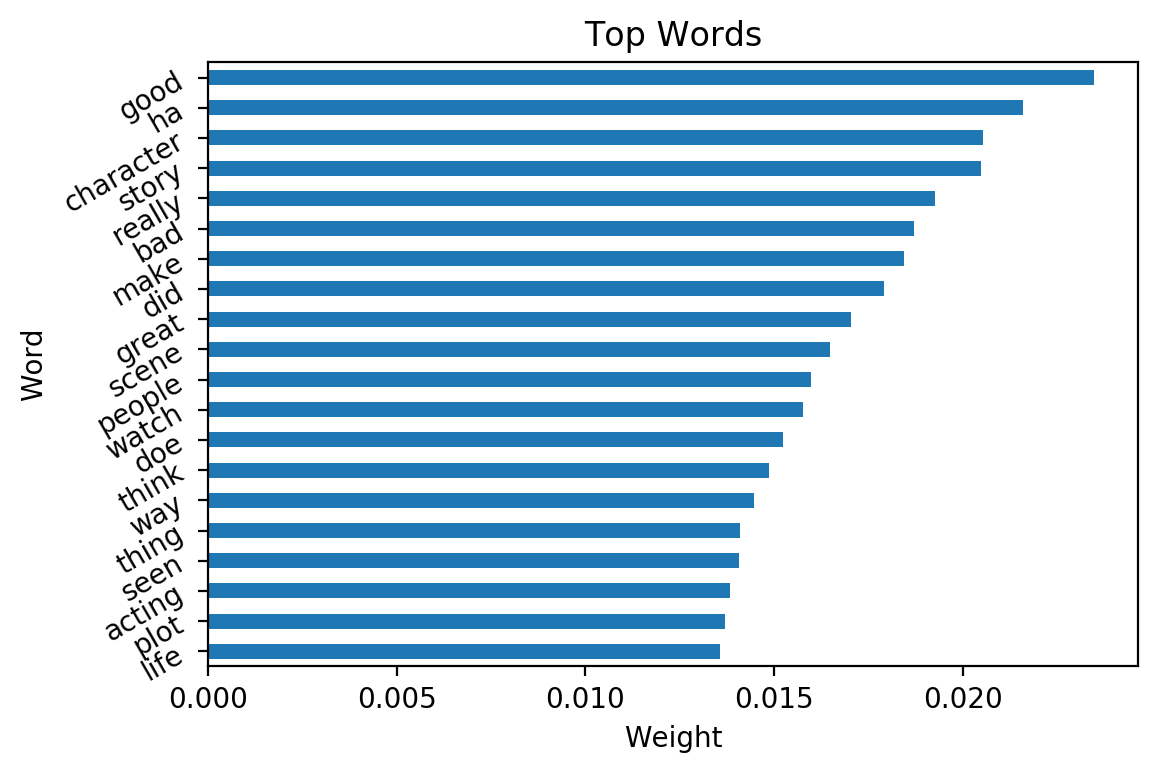

<Figure size 432x576 with 0 Axes>

In [8]:
visualize.plot_top_words(df.review,interactive=False, save_path=args.visualization_path)

Image(os.path.join(args.visualization_path,"top_words.png"))

In [9]:
visualize.plot_top_words_conditional(df.review,df.sentiment,interactive=True, save_path=args.visualization_path)

HTML(os.path.join(args.visualization_path,"top_words_conditional.html"))

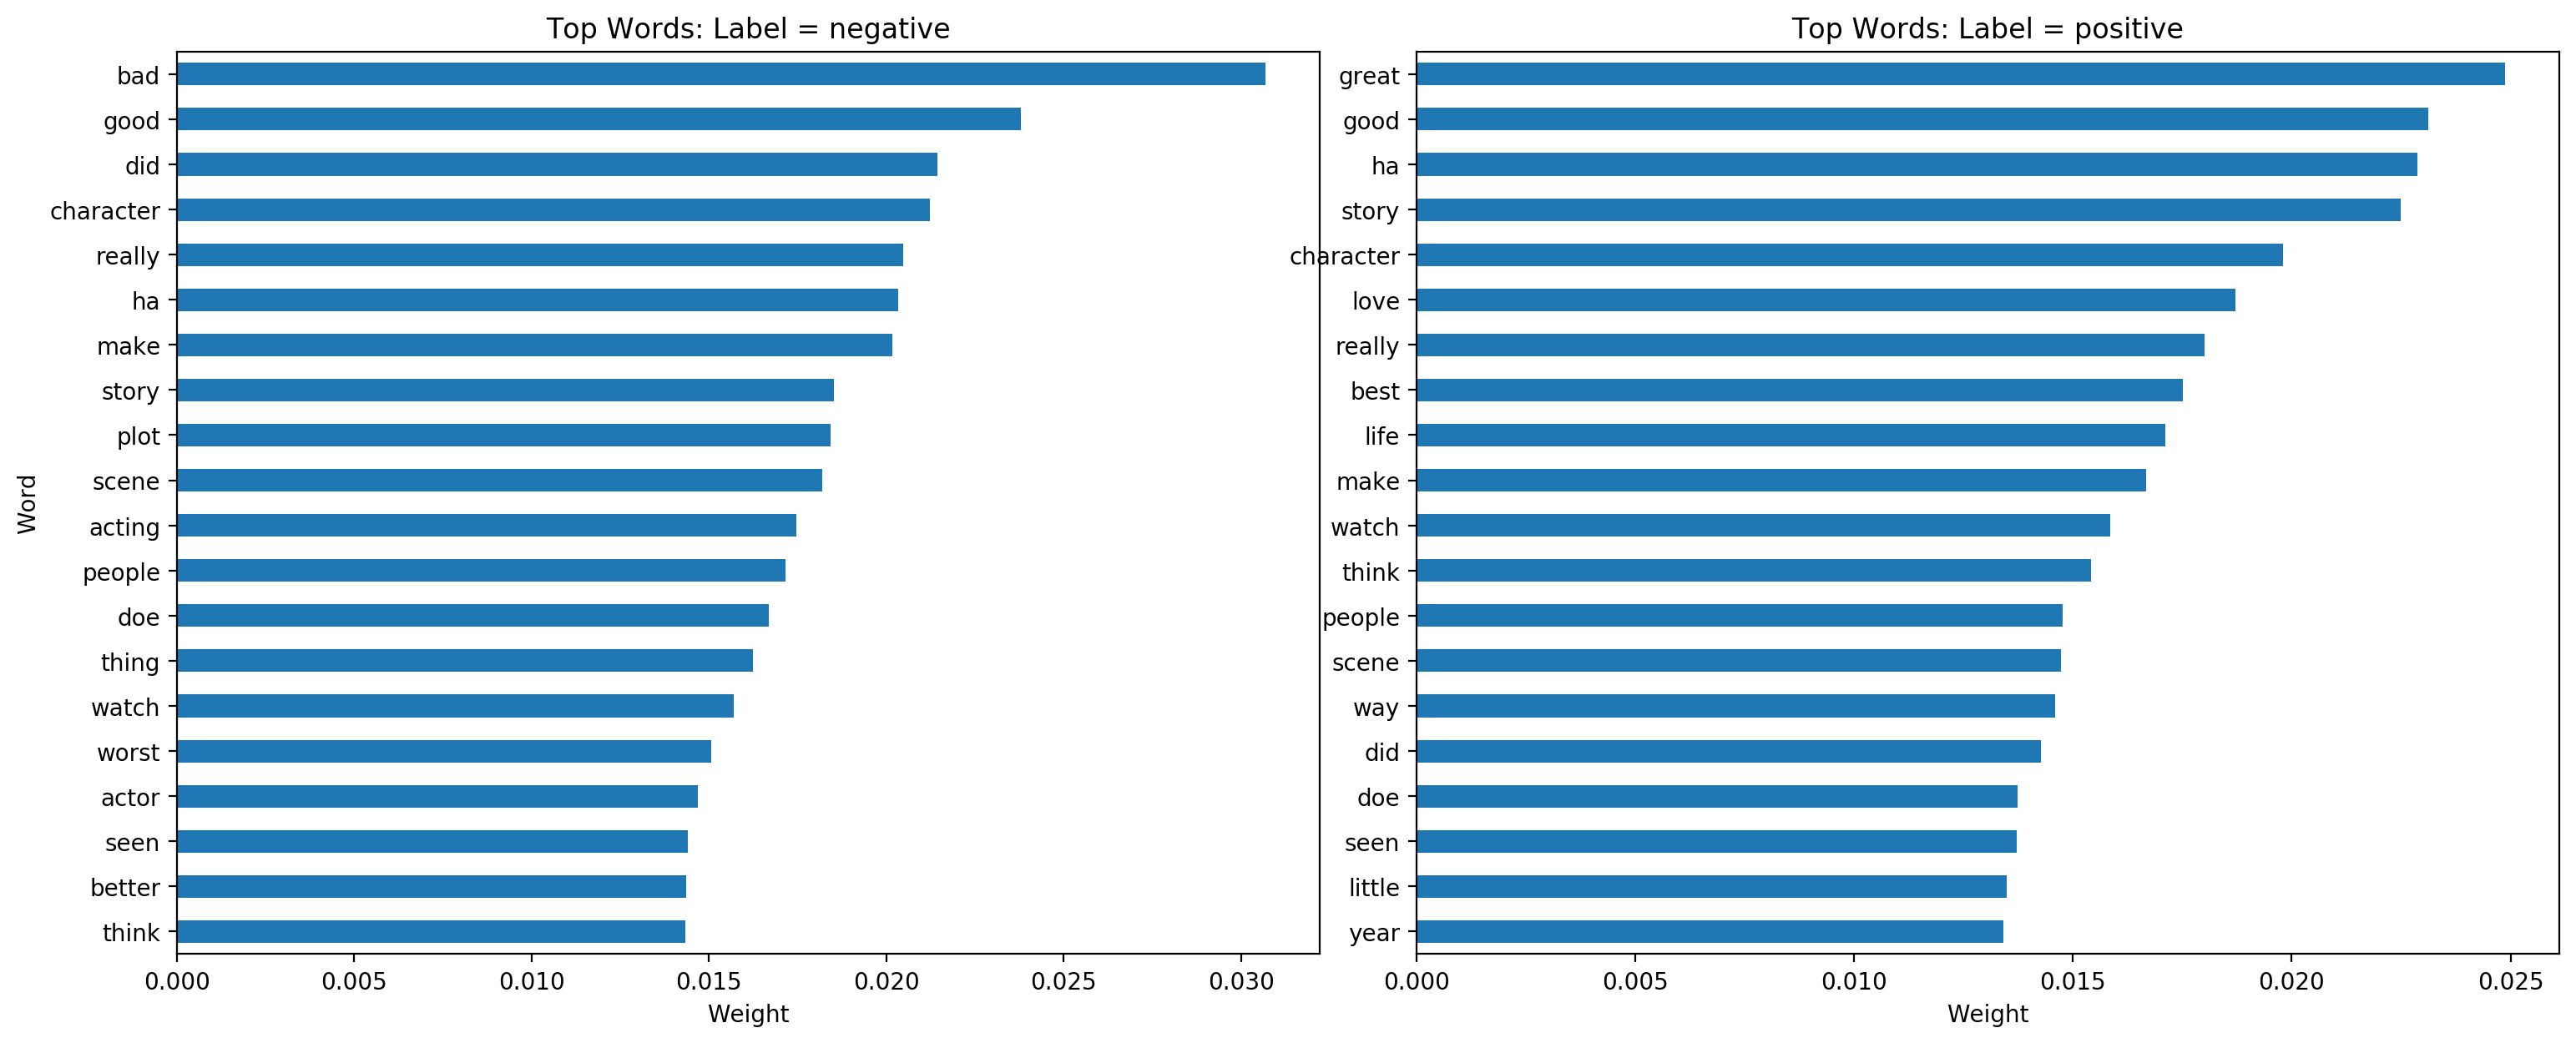

In [10]:
visualize.plot_top_words_conditional(df.review,df.sentiment,interactive=False, save_path=args.visualization_path)

Image(os.path.join(args.visualization_path,"top_words_conditional.png"))

In [11]:
visualize.spacy_dependency_graph(df.review.iloc[0], save_path=args.visualization_path)

HTML(os.path.join(args.visualization_path,"dependency_graph.html"))

In [12]:
visualize.spacy_entities(df.review.iloc[0], save_path=args.visualization_path)

HTML(os.path.join(args.visualization_path,"entities.html"))

In [13]:
model = torch.load(os.path.join(args.model_save_path,'model.bin'))
config = AutoConfig.from_pretrained(args.transformer_config_path, output_hidden_states=True, output_attentions=True)
roberta_basemodel = model.base_model

I0805 18:28:43.502928 4432354752 modeling.py:230] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
I0805 18:28:53.111629 4432354752 configuration_utils.py:283] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-config.json from cache at /Users/victor/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.117c81977c5979de8c088352e74ec6e70f5c66096c28b61d3c50101609b39690
I0805 18:28:53.112561 4432354752 configuration_utils.py:319] Model config RobertaConfig {
  "_num_labels": 2,
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bad_words_ids": null,
  "bos_token_id": 0,
  "decoder_start_token_id": null,
  "do_sample": false,
  "early_stopping": false,
  "eos_token_id": 2,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  

In [14]:
label2idx = pickle.load(open(os.path.join(args.model_save_path,'label2idx.pkl'),'rb'))
idx2label = {val:key for key,val in label2idx.items()}

In [15]:
if args.berttweettokenizer_path:
    tokenizer = BERTweetTokenizer(args.berttweettokenizer_path)
else:
    tokenizer = AutoTokenizer.from_pretrained(args.transformer_model_pretrained_path)

if not args.berttweettokenizer_path:
    try:
        bpetokenizer = tokenizers.ByteLevelBPETokenizer(args.bpe_vocab_path, \
                                        args.bpe_merges_path)
    except:
        bpetokenizer = None 
else:
    bpetokenizer = None

I0805 18:28:54.116197 4432354752 configuration_utils.py:283] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-config.json from cache at /Users/victor/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.117c81977c5979de8c088352e74ec6e70f5c66096c28b61d3c50101609b39690
I0805 18:28:54.117082 4432354752 configuration_utils.py:319] Model config RobertaConfig {
  "_num_labels": 2,
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bad_words_ids": null,
  "bos_token_id": 0,
  "decoder_start_token_id": null,
  "do_sample": false,
  "early_stopping": false,
  "eos_token_id": 2,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "is_encoder_decoder": false,
  "label2id": {
    "LABEL

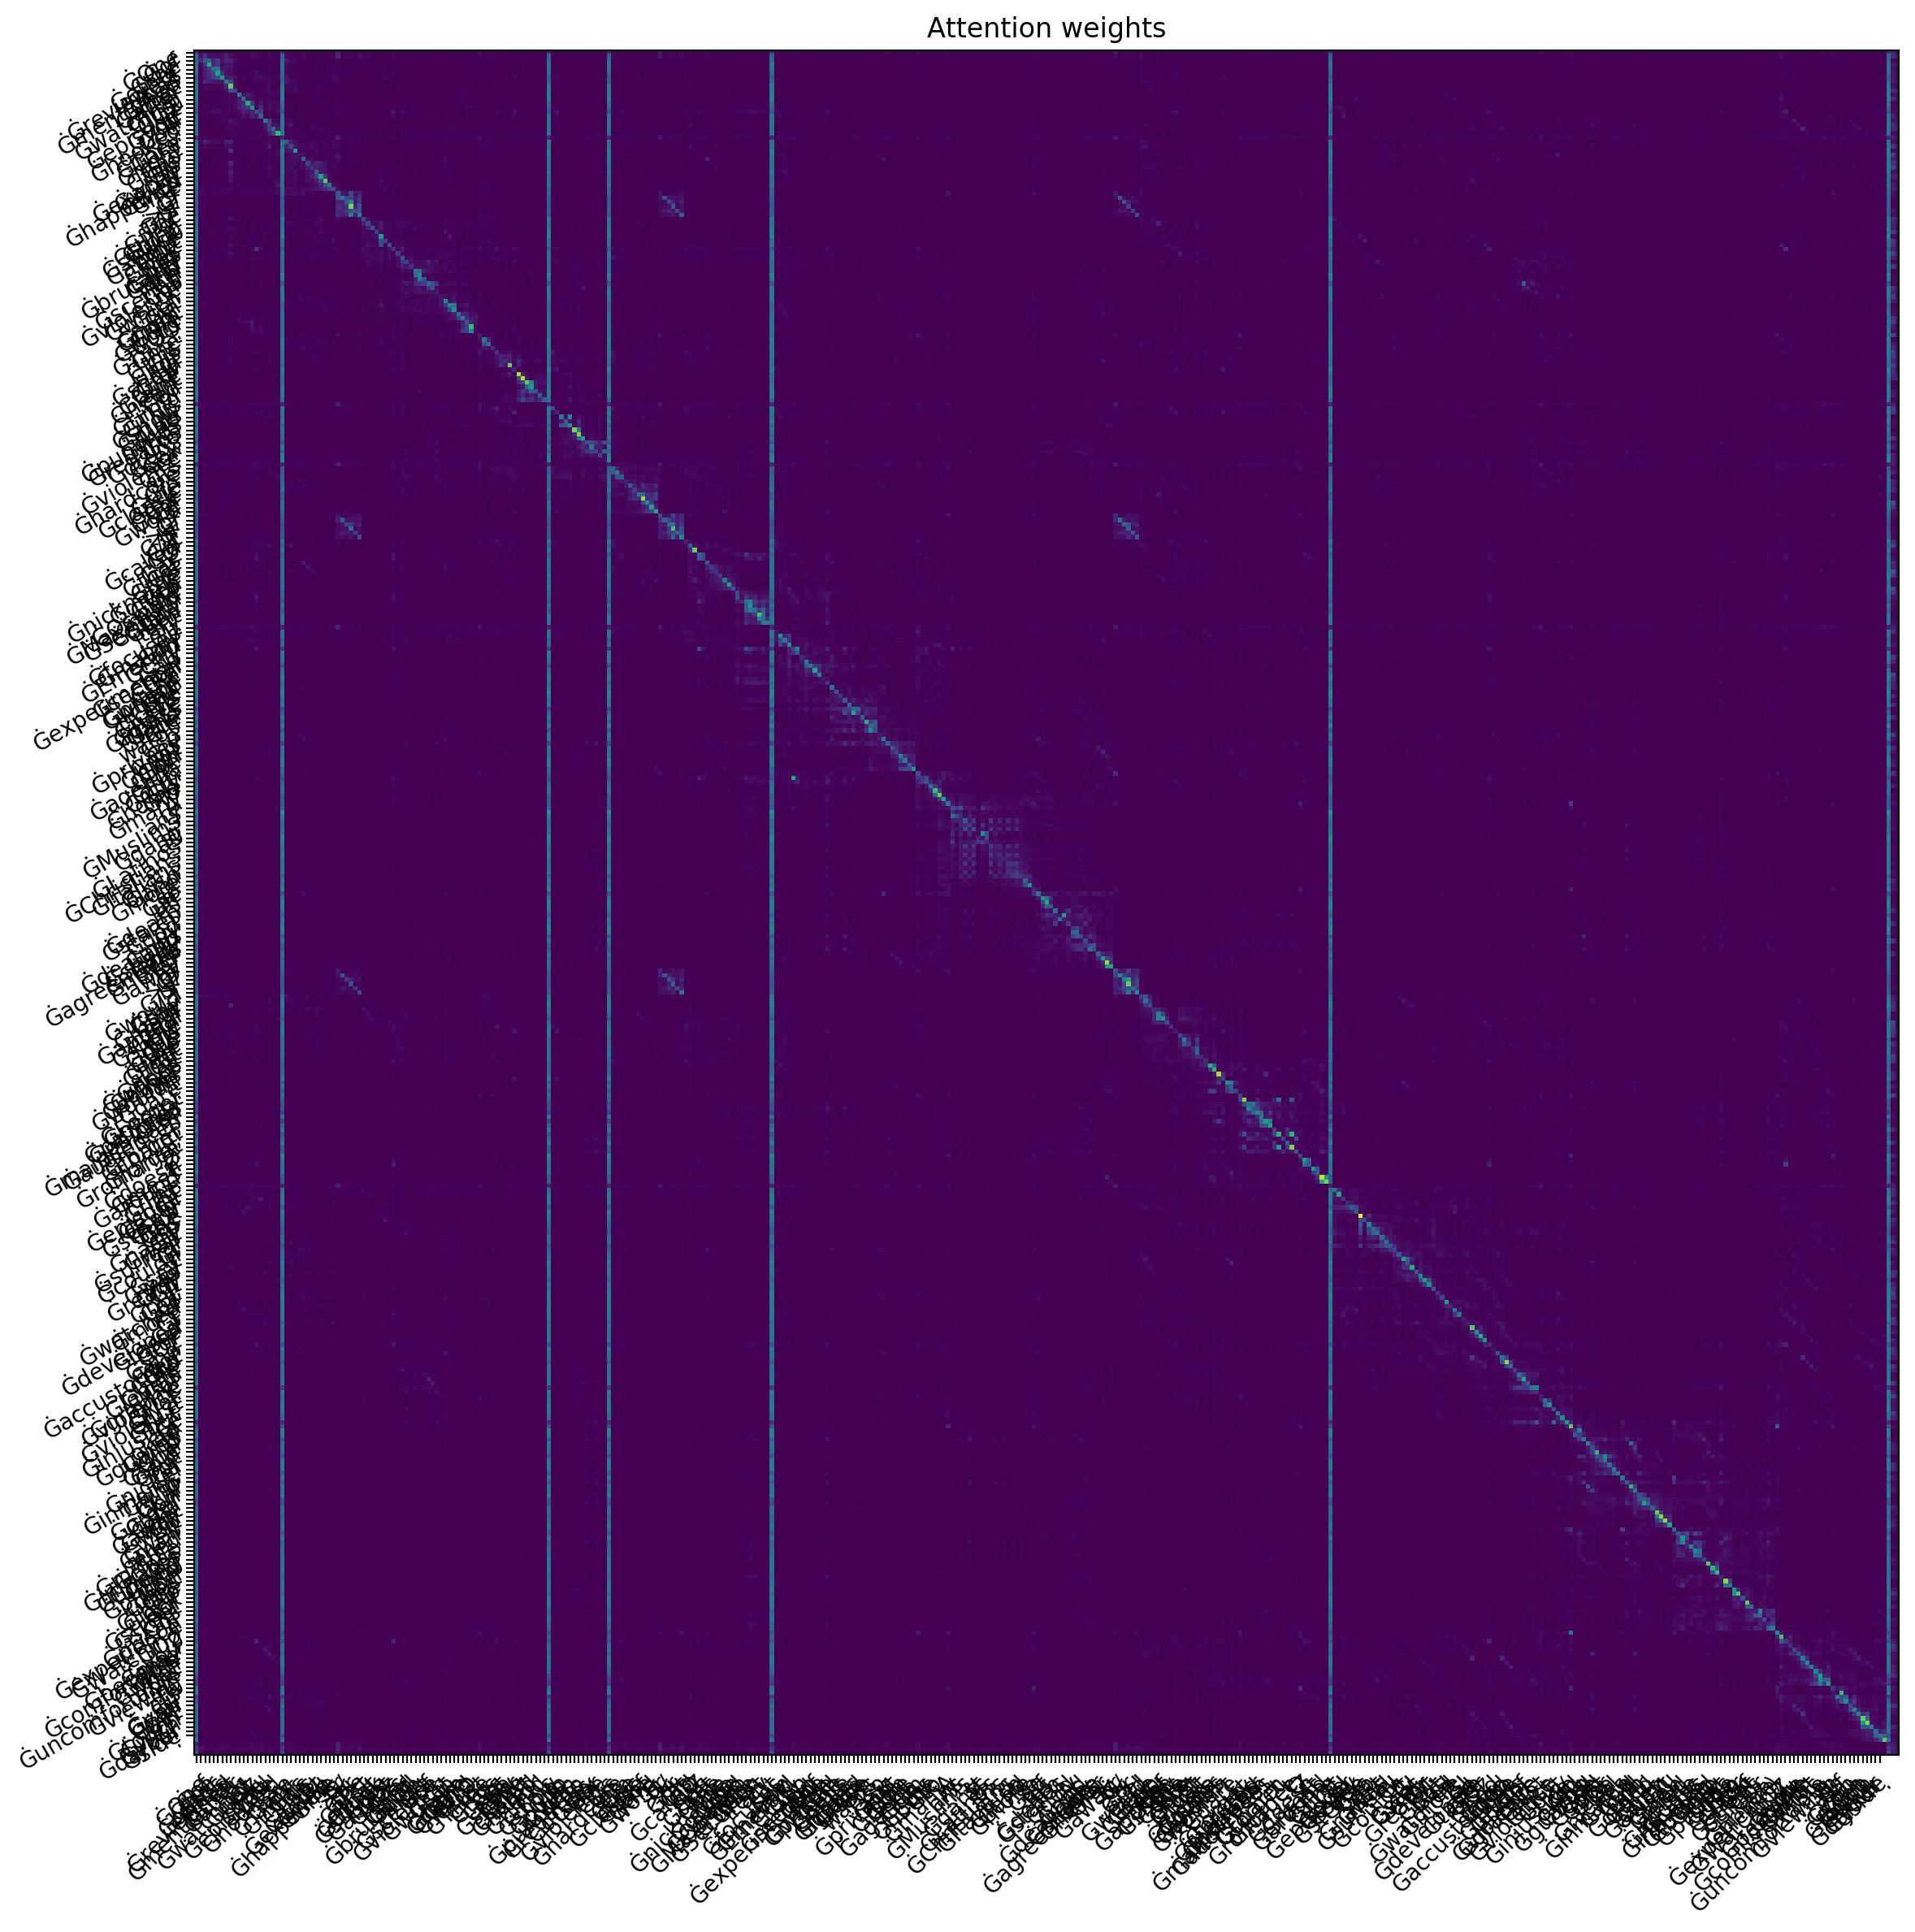

In [16]:
visualize.plot_attention_weights(df.review.iloc[0],roberta_basemodel, \
                                 bpetokenizer=bpetokenizer,tokenizer=tokenizer, save_path=args.visualization_path)
Image(os.path.join(args.visualization_path,"attention_weights.png"))

In [ ]:
weights = visualize.conditional_weights(df.review.iloc[0],model, max_alpha=5, \
                              bpetokenizer=bpetokenizer,tokenizer=tokenizer,max_len=args.max_text_len, \
                              save_path=args.visualization_path)

HTML(os.path.join(args.visualization_path,"conditional_weights.html"))

In [18]:
visualize.captum_text_interpreter(df.review.iloc[0],model,\
                                  bpetokenizer=bpetokenizer,tokenizer=tokenizer, idx2label=idx2label)


In [10]:
#visualize.plot_topic_models(df.review, num_topics=10, topk=10)

#HTML(os.path.join('../visualizations/',"topic_model.html"))